Dataset Summary: {'weed': 1000, 'wheat': 1000}


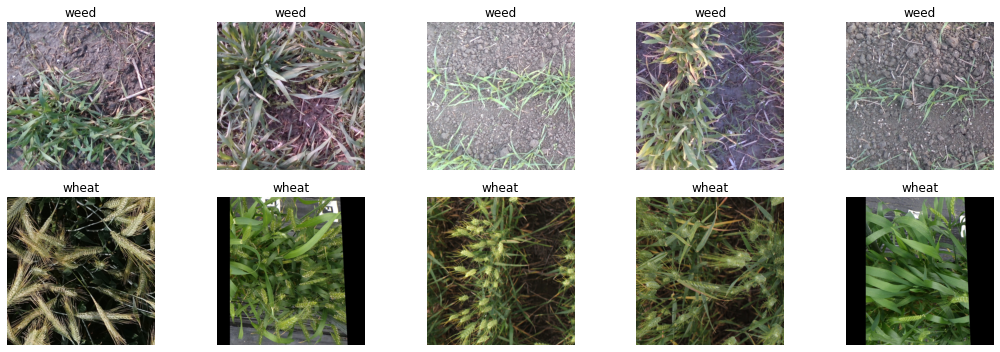

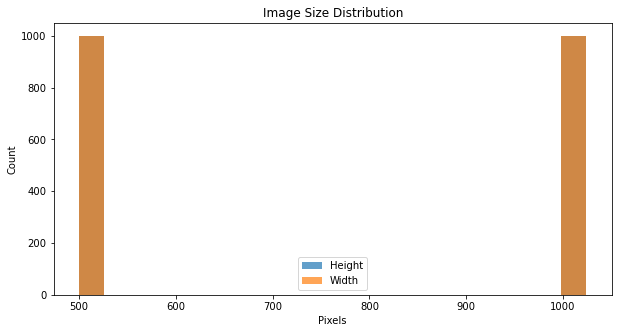

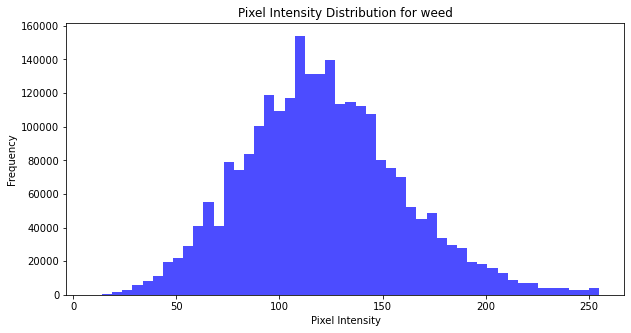

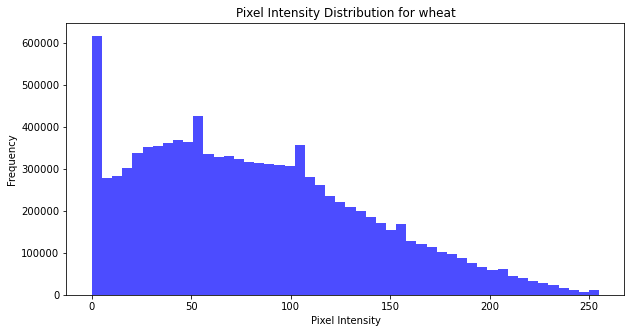

Preprocessed Images Shape: (2000, 128, 128, 3)
Labels Shape: (2000,)
Training Set: (1600, 128, 128, 3), Test Set: (400, 128, 128, 3)


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Directory Paths
data_dir = r"C:\Users\Siddaraju.B.R\Downloads\wdataset\wdataset"  # Replace with your path
classes = ["weed", "wheat"]

# Step 1: Dataset Summary
def summarize_dataset(data_dir, classes):
    summary = {}
    for cls in classes:
        path = os.path.join(data_dir, cls)
        if not os.path.exists(path):
            print(f"Directory not found: {path}")
            summary[cls] = 0
            continue
        images = [img for img in os.listdir(path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        summary[cls] = len(images)
    return summary

summary = summarize_dataset(data_dir, classes)
print("Dataset Summary:", summary)

# Step 2: Visualize Sample Images
def plot_sample_images(data_dir, classes, n_samples=5):
    fig, axes = plt.subplots(len(classes), n_samples, figsize=(15, 5))
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(data_dir, cls)
        images = [img for img in os.listdir(cls_dir) if img.endswith(('.jpg', '.png', '.jpeg'))][:n_samples]
        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(cls)
    plt.tight_layout()
    plt.show()

plot_sample_images(data_dir, classes)

# Step 3: Analyze Image Sizes
def analyze_image_sizes(data_dir, classes):
    sizes = []
    for cls in classes:
        cls_dir = os.path.join(data_dir, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                sizes.append(img.shape[:2])  # Height, Width
    return sizes

sizes = analyze_image_sizes(data_dir, classes)
heights, widths = zip(*sizes) if sizes else ([], [])
plt.figure(figsize=(10, 5))
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.title('Image Size Distribution')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.legend()
plt.show()

# Step 4: Pixel Intensity Distribution
def plot_pixel_intensity(data_dir, classes, n_samples=10):
    for cls in classes:
        cls_dir = os.path.join(data_dir, cls)
        images = [img for img in os.listdir(cls_dir) if img.endswith(('.jpg', '.png', '.jpeg'))][:n_samples]
        pixel_values = []
        for img_name in images:
            img_path = os.path.join(cls_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                pixel_values.extend(img.flatten())
        if pixel_values:
            plt.figure(figsize=(10, 5))
            plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
            plt.title(f'Pixel Intensity Distribution for {cls}')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            plt.show()

plot_pixel_intensity(data_dir, classes)

# Step 5: Preprocessing - Resizing and Normalization
def preprocess_images(data_dir, classes, target_size=(128, 128)):
    images, labels = [], []
    for label, cls in enumerate(classes):
        cls_dir = os.path.join(data_dir, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                img = img / 255.0  # Normalize to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

images, labels = preprocess_images(data_dir, classes)
print(f"Preprocessed Images Shape: {images.shape}")
print(f"Labels Shape: {labels.shape}")

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")